# Multivariable Gaussian Distribution 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


<AxesSubplot:xlabel='x2', ylabel='Count'>

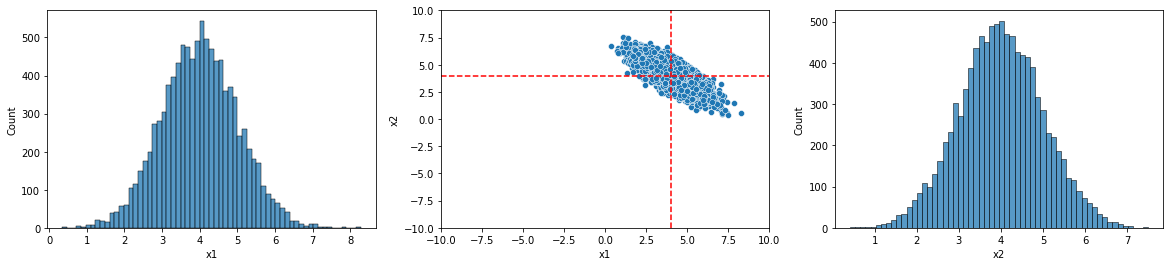

In [2]:
m = np.array([4,4])
cov_mat = np.array([[1,-0.8],
               [-0.8,1]])
a = pd.DataFrame(np.random.multivariate_normal(mean = m, cov= cov_mat,size = 10000), columns= ['x1','x2'])
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)

sn.histplot(x = a['x1'])

plt.subplot(1,3,2)
sn.scatterplot(x = 'x1', y = 'x2', data = a)
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.axhline(np.mean(a['x2']), color = 'red', linestyle = 'dashed')
plt.axvline(np.mean(a['x1']), color = 'red', linestyle = 'dashed')


plt.subplot(1,3,3)
sn.histplot(x = a['x2'])


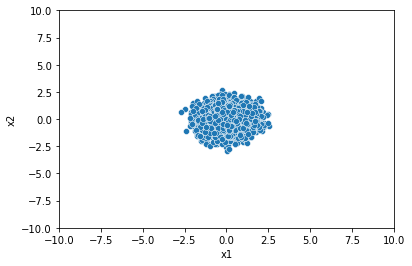

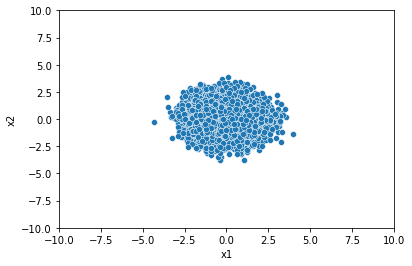

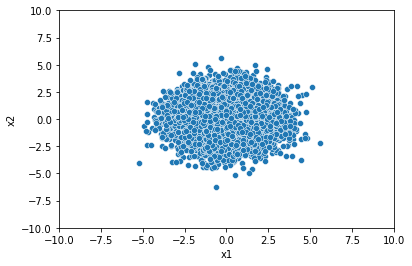

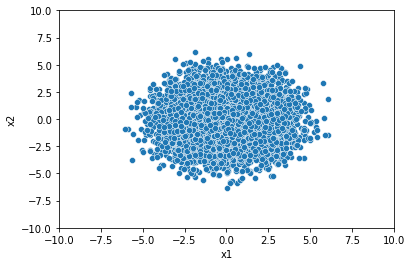

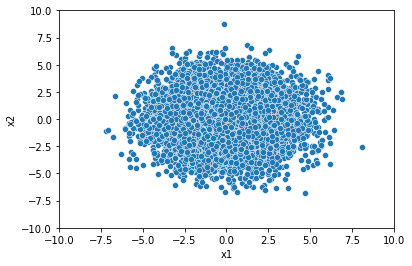

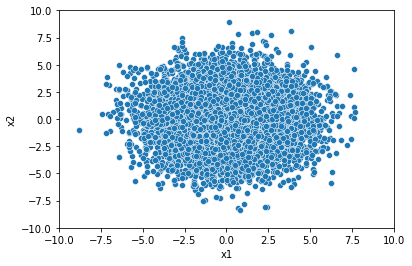

In [3]:
## Covariance as 0 and variance is same and increasing

m = np.array([0,0])
covar_ranges = [0.5,1,2,3,4,5]
for x in covar_ranges:    
    cov_mat = np.array([[x,0],
                   [0,x]])
    a = pd.DataFrame(np.random.multivariate_normal(mean = m, cov= cov_mat,size = 10000), columns= ['x1','x2'])
    sn.scatterplot(x = 'x1', y = 'x2', data = a)
    plt.ylim([-10,10])
    plt.xlim([-10,10])
    plt.show()

# Bias variance tradeoff

In [4]:
from sklearn.linear_model import LinearRegression

,x_var,y_var,y_var_with_noise
999,3.0,6.222043,6.362987


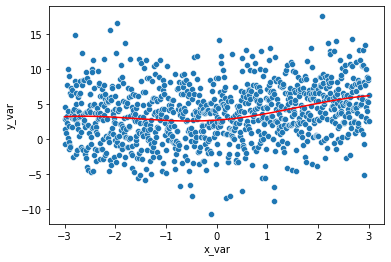

In [5]:
## Lets create a function f(x)
## Creating the known function
pop_size = 1000

x_var = np.linspace(-3, 3,pop_size)
y_var = 0.5*x_var + np.sqrt(np.max(x_var, 0)) - np.cos(x_var) + 2
df =pd.DataFrame({ 'x_var': x_var, 'y_var':y_var})
noise = np.random.normal(0,4,pop_size)
df['y_var_with_noise'] = df['y_var']+noise
sn.lineplot(x = 'x_var', y = 'y_var', data = df, color = 'red')
sn.scatterplot(x = 'x_var', y = 'y_var_with_noise', data = df)
one_point = df.iloc[[999],:]
one_point

# Now lets try to fit degree equations to the data

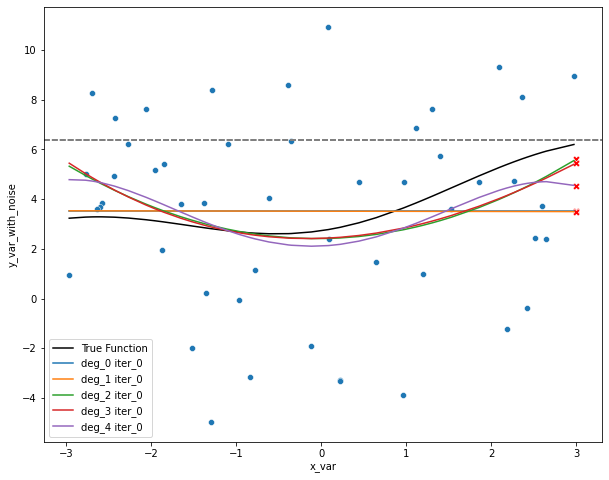

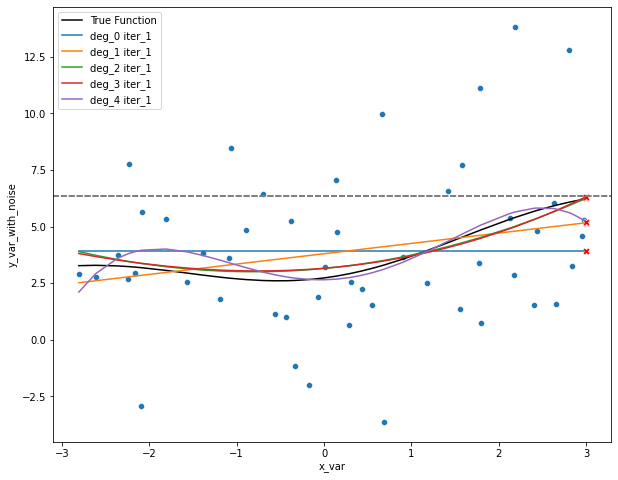

In [6]:
## Sample from Data and try to fit multiple order curves


for itera in range(2):
    ## Sampled Data for the iteration
    plt.figure(figsize = (10,8))
    sampled_df = df.sample(n = 50, replace = False)
    sn.scatterplot(x = 'x_var', y = 'y_var_with_noise', data = sampled_df)
    sn.lineplot(x = 'x_var', y = 'y_var', data = sampled_df, label = 'True Function', color = 'black')

    ## Each degree
    for deg in range(5):
        dep = sampled_df['y_var_with_noise'].to_numpy()
        indep = np.vander(np.squeeze(sampled_df['x_var']), deg+1)
        lm=LinearRegression(fit_intercept=False)
        lm.fit(indep,dep)
        pred = lm.predict(indep)
        sn.lineplot(x = sampled_df['x_var'], y = pred, label = "deg_"+ str(deg) + " iter_"+str(itera))
        
    ## Prediction for one point
        pred_one_point = lm.predict(np.vander(one_point['x_var'],deg+1))
        sn.scatterplot(y = pred_one_point, x = one_point['x_var'], color = 'red', marker = 'X', s = 50)
        plt.axhline(one_point['y_var_with_noise'].values, linestyle = 'dashed', color = 'gray')
    plt.show()

# Lets just look at one point's prediction a thousand times

In [7]:
## Sample from Data and try to fit multiple order curves

df_point_pred = pd.DataFrame([], index = [x for x in range(1000)], columns= [x for x in range(5)])

for itera in range(1000):
    ## Sampled Data for the iteration
    sampled_df = df.sample(n = 50, replace = False)
    ## Each degree
    for deg in range(5):
        dep = sampled_df['y_var_with_noise'].to_numpy()
        indep = np.vander(np.squeeze(sampled_df['x_var']), deg+1)
        lm=LinearRegression(fit_intercept=False)
        lm.fit(indep,dep)
    ## Prediction for one point
        pred_one_point = lm.predict(np.vander(one_point['x_var'],deg+1))[0]
        df_point_pred.iloc[itera, deg] = pred_one_point
df_point_pred.head(5)

,0,1,2,3,4
0,3.311589,4.111101,5.849501,5.349049,4.805392
1,3.85201,4.521404,5.676553,6.80169,6.45167
2,3.493646,3.767782,4.269862,3.527483,2.948252
3,3.610576,5.442778,5.217128,5.357257,3.7989
4,3.996576,4.856711,7.112623,5.156308,5.598139


C:\Users\arora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

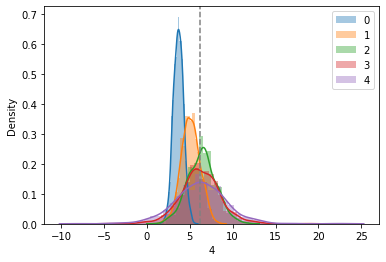

In [8]:
for x in range(5):
    sn.distplot(df_point_pred.iloc[:,x], label = str(x))
    plt.legend()
plt.axvline(one_point['y_var'].values, linestyle = 'dashed', color = 'gray')

# Let's do this for 1000 test points

In [9]:
from sklearn.metrics import mean_squared_error

<AxesSubplot:xlabel='x_var', ylabel='y_var'>

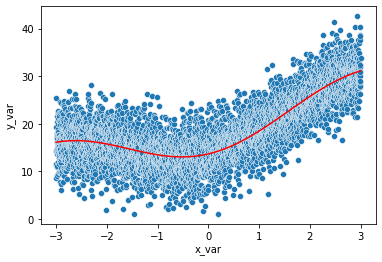

In [10]:
## Lets do a bias variance trade-off plot for this case
## Function to generate the signal
pop_size = 5000

x_var = np.linspace(-3, 3,pop_size)
y_var = 5*(0.5*x_var + np.sqrt(np.max(x_var, 0)) - np.cos(x_var) + 2)
df =pd.DataFrame({ 'x_var': x_var, 'y_var':y_var})
noise = np.random.normal(0,4,pop_size)
df['y_var_with_noise'] = df['y_var']+noise
sn.lineplot(x = 'x_var', y = 'y_var', data = df, color = 'red')
sn.scatterplot(x = 'x_var', y = 'y_var_with_noise', data = df)


$$ E[E[(F_p(x) - Y)^2]] $$ 

In [11]:
## Now lets calculate the MSE for each of the polynomials
## Split the data into train and test
test_data = df.sample(n = 500, replace = False,  random_state= 0)
train_data = df.drop(test_data.index, axis = 0)

In [12]:
## Now lets fit a model of degree d to this
## for now we will fix degree =2 and will evaluate all the terms 
deg = 5
train_mse = []
test_mse  = []
iterations = 5000

## For calculating bias
train_pred_df = pd.DataFrame([], columns=['v_'+str(i) for i in range(iterations)])
test_pred_df = pd.DataFrame([], columns=['v_'+str(i) for i in range(iterations)])
#####################################

for x in range(iterations): # Number of iterations
    
    ## Sample 60 data points from the test
    
    ## Model Fitting
    train_sample_size = 1000
    train_sample = train_data.sample(n = train_sample_size, replace = False)
    indep = np.vander(np.squeeze(train_sample.loc[:,'x_var']), deg+1)
    dep = train_sample.loc[:,'y_var_with_noise'].to_numpy()
    lm = LinearRegression()
    lm.fit(indep,dep)
    
    ## MSE TRAIN
    train_predict = lm.predict(indep)
    train_mse.append(mean_squared_error(train_predict, dep))
    
    ## Lets use it to create the test data stats as well
    
    ## MSE TEST
    test_indep = np.vander(np.squeeze(test_data.loc[:,'x_var']), deg+1)
    test_dep = test_data.loc[:,'y_var_with_noise'].to_numpy()
    test_predict = lm.predict(test_indep)
    test_mse.append(mean_squared_error(test_predict, test_dep))
    
    
    ### Lets predict Bias Now 
    ### Bias is E(Fp(x) - f(x))
    
    ## Lets calculate the expected value of fp(x) first
    train_pred_df.iloc[:,x] = train_predict
    test_pred_df.iloc[:,x] = test_predict
    
    
    
## MSE CALC
#exp_mse_train = np.mean(train_mse)
exp_mse_test = np.mean(test_mse)

## BIAS CALC For Test
bias_test  = np.mean((np.array(test_pred_df.apply(np.mean, axis = 1)) - np.array(test_data['y_var'].values))**2)

## Noise 
noise = 16

## Variance Calculation

var_test = test_pred_df.apply(np.var, ddof = 0, axis = 1).mean()

print(" E(MSE) is :",exp_mse_test)
print(" B is :",bias_test)
print(" VAR is :", var_test)
print(" Noise is:", noise)
print("B+V+N: ",bias_test+ noise+ var_test)

 E(MSE) is : 15.955505294136886
 B is : 0.016829161900727974
 VAR is : 0.07566646389220387
 Noise is: 16
B+V+N:  16.09249562579293


In [18]:
arr_1 = np.array([2,3,4])
arr_2 = np.array([1.8,3.1,4.2])
print(mean_squared_error(arr_1,arr_2))
print(np.mean((arr_1-arr_2)**2))

0.030000000000000023
0.030000000000000023
